<a href="https://colab.research.google.com/github/rajsecrets/Generative-Deep-Learning/blob/main/01_Our_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras import datasets, utils

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
 layers.Flatten(input_shape=(32, 32, 3)),
 layers.Dense(200, activation = 'relu'),
 layers.Dense(150, activation = 'relu'),
 layers.Dense(10, activation = 'softmax'),
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])


In [7]:
model.fit(x_train
 , y_train
 , batch_size = 32
 , epochs = 10
 , shuffle = True
 )


Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8406 - accuracy: 0.3337
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6691 - accuracy: 0.4009
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5833 - accuracy: 0.4373
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5307 - accuracy: 0.4565
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4944 - accuracy: 0.4691
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4536 - accuracy: 0.4823
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4317 - accuracy: 0.4901
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3989 - accuracy: 0.5022
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3786 - accuracy: 0.5083
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.35

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4278 - accuracy: 0.4974


[1.4277839660644531, 0.4973999857902527]

In [9]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
 , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]


313/313 [==============================] - 1s 2ms/step


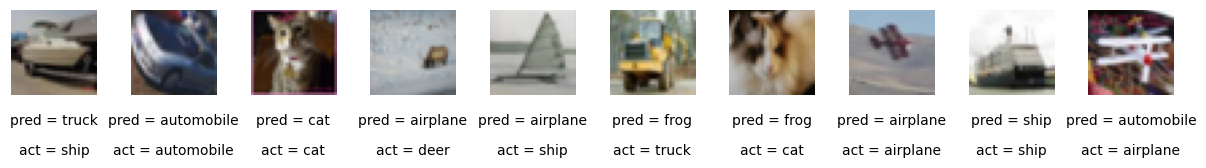

In [10]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
 img = x_test[idx]
 ax = fig.add_subplot(1, n_to_show, i+1)
 ax.axis('off')
 ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
 , ha='center', transform=ax.transAxes)
 ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
 , ha='center', transform=ax.transAxes)
 ax.imshow(img)
